<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 150.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 156.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 147.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 165.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 174.8 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


Missing values of ConvertedCompYearly:  42002
Missing values of ConvertedCompYearly:  0


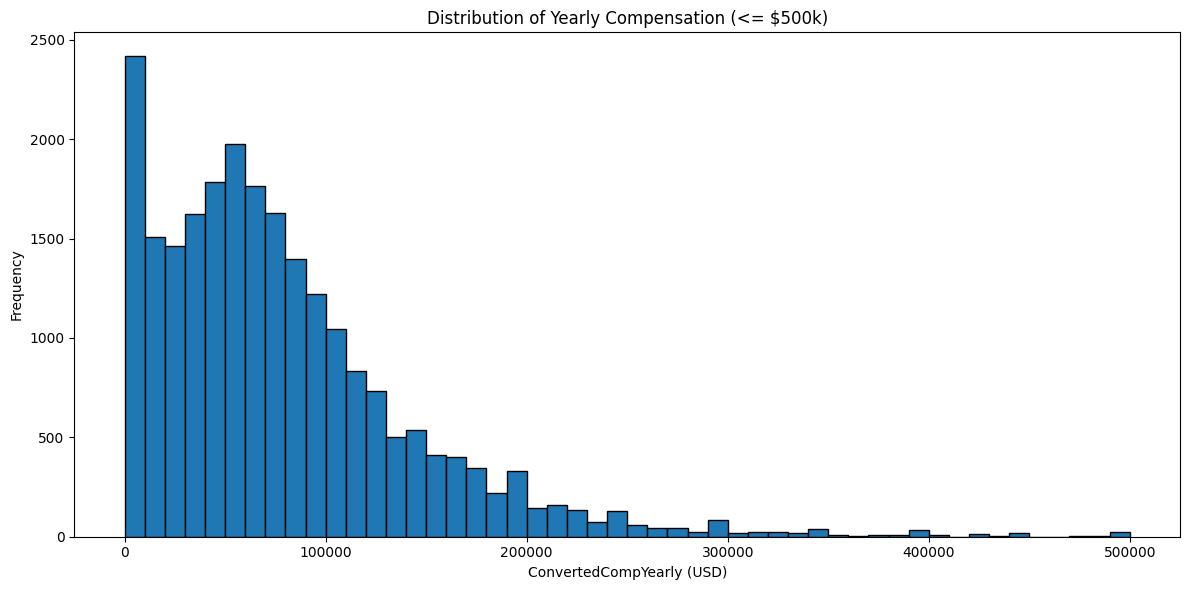

In [12]:
## Write your code here

missing_values_comp = df['ConvertedCompYearly'].isna().sum()
print('Missing values of ConvertedCompYearly: ', missing_values_comp)

df_comp = df['ConvertedCompYearly'].dropna()
print('Missing values of ConvertedCompYearly: ', df_comp.isna().sum())


df_comp = df_comp[df_comp <= 500_000]  # adjust cutoff as needed
plt.figure(figsize=(12,6))
plt.hist(df_comp, bins=50, color='C0', edgecolor='black')
plt.title('Distribution of Yearly Compensation (<= $500k)')
plt.xlabel('ConvertedCompYearly (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [43]:
## Write your code here

df_median_compensation = df[['Employment', 'ConvertedCompYearly']].dropna()

fulltime_employed = df_median_compensation[df_median_compensation['Employment'] == 'Employed, full-time']
median_compensation = fulltime_employed['ConvertedCompYearly'].median()

print(f"Median compensation for 'Employed, full-time': ${median_compensation:,.2f}")



Median compensation for 'Employed, full-time': $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



Median compensation by country:
Country
India           $17,945
Brazil          $24,243
Ukraine         $33,792
Italy           $41,888
Spain           $51,555
France          $53,703
Poland          $56,422
Netherlands     $69,814
Germany         $73,036
UK              $84,904
Canada          $87,231
USA            $144,000
Name: ConvertedCompYearly, dtype: object


/tmp/ipykernel_300/2192110873.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_comp, order=ordered_countries, palette='vlag')


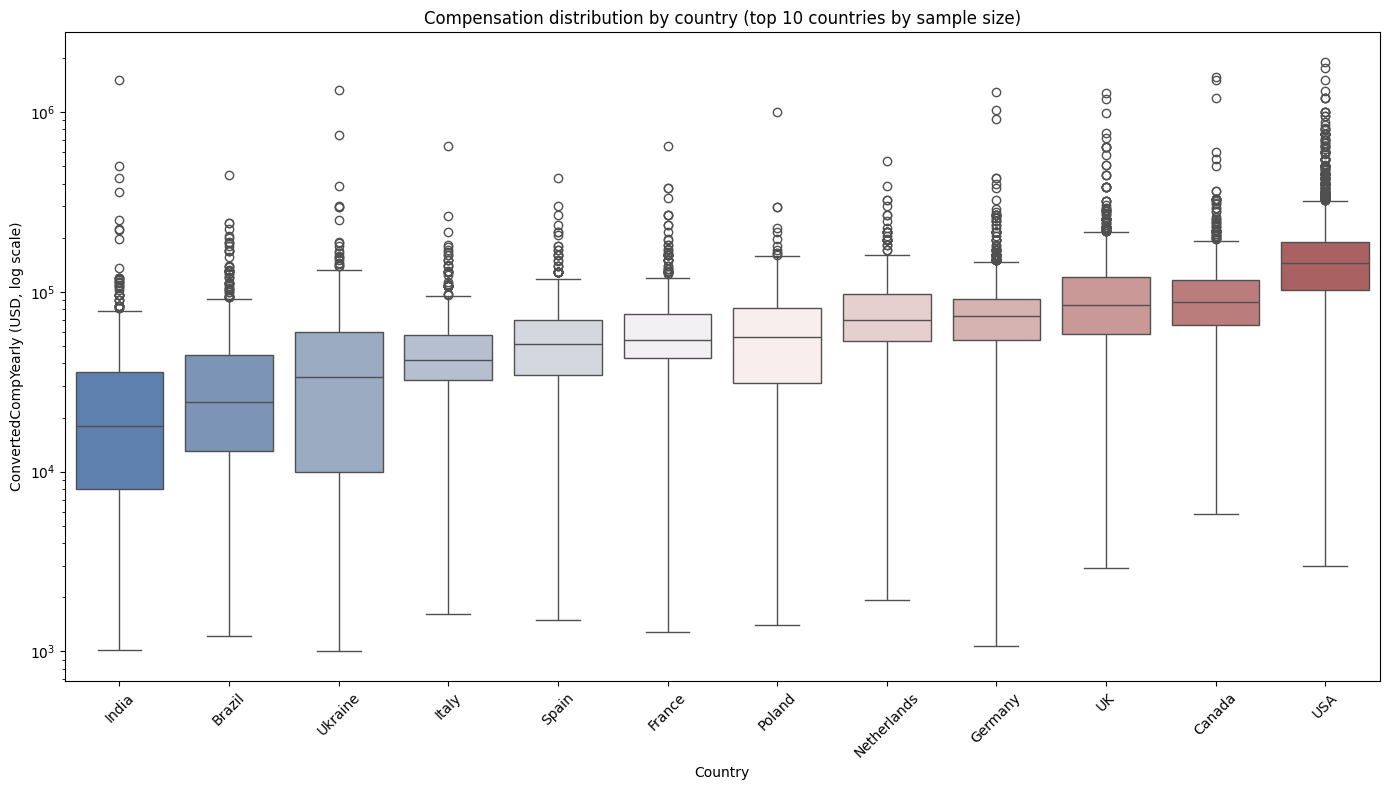

/tmp/ipykernel_300/2192110873.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_comp, order=ordered_countries, palette='pastel')


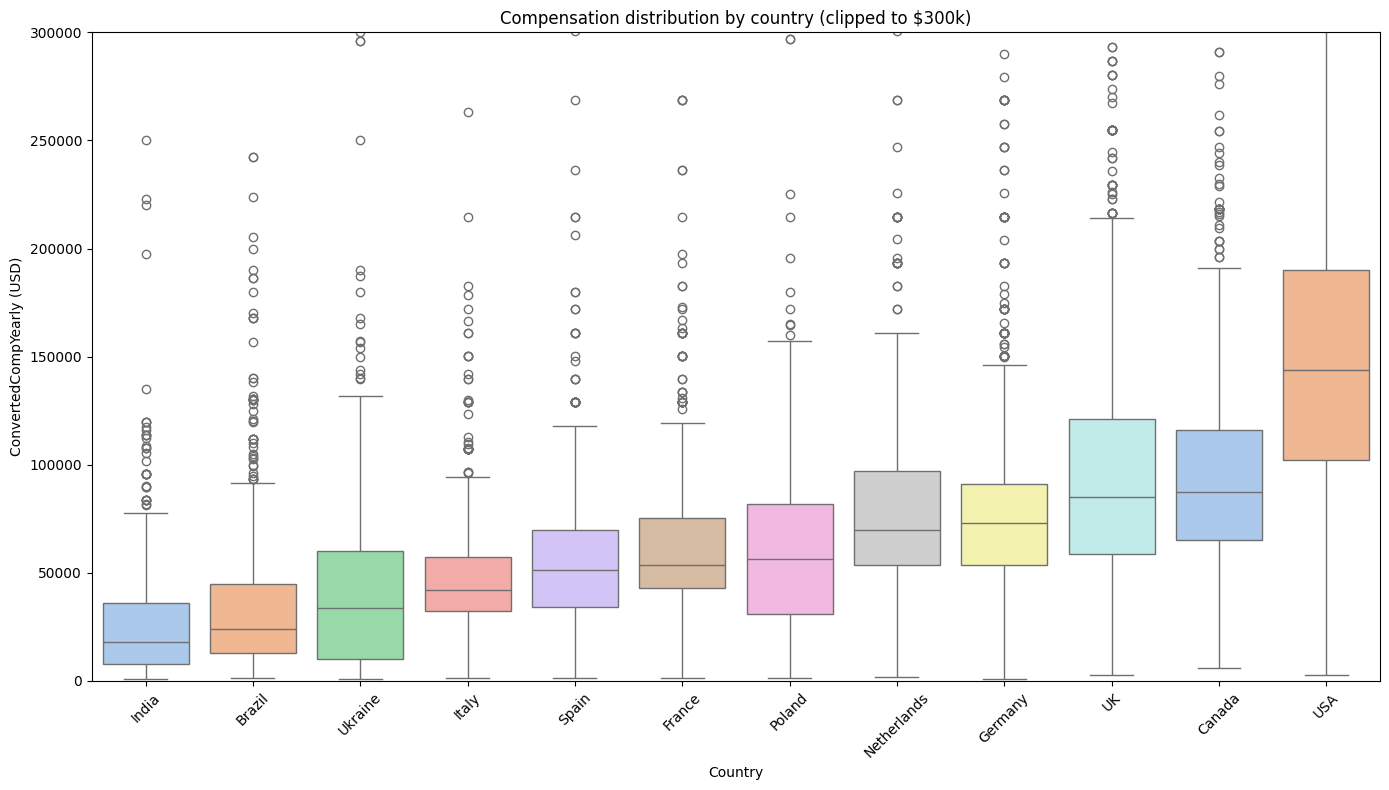

In [51]:
## Write your code here

# prepare data
df_comp_country = df[['Country','ConvertedCompYearly']].dropna()
# remove extreme values
df_comp_country = df_comp_country[(df_comp_country['ConvertedCompYearly'] >= 1000) & (df_comp_country['ConvertedCompYearly'] <= 2_000_000)]

#get top countries
df_comp_country['Country'] = df_comp_country['Country'].replace({
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'USA'})

# choose countries to compare (top 10 by sample size)
country_counts = df_comp_country['Country'].value_counts()
top_country = country_counts.head(12).index.tolist()
df_top_comp = df_comp_country[df_comp_country['Country'].isin(top_country)]

# order countries by median compensation
medians = df_top_comp.groupby('Country')['ConvertedCompYearly'].median().sort_values()
ordered_countries = medians.index.tolist()

# print median table
print("Median compensation by country:")
print(medians.apply(lambda x: f"${x:,.0f}"))

# Boxplot (log-scale y-axis to handle skew)
plt.figure(figsize=(14,8))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_comp, order=ordered_countries, palette='vlag')
plt.yscale('log')
plt.ylabel('ConvertedCompYearly (USD, log scale)')
plt.xlabel('Country')
plt.title('Compensation distribution by country (top 10 countries by sample size)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: linear-scale boxplot focusing on typical range (clip outliers)
plt.figure(figsize=(14,8))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_comp, order=ordered_countries, palette='pastel')
plt.ylim(0, 300000)  # adjust as needed to focus on most respondents
plt.ylabel('ConvertedCompYearly (USD)')
plt.xlabel('Country')
plt.title('Compensation distribution by country (clipped to $300k)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [53]:
## Write your code here

comp_clean = df['ConvertedCompYearly'].dropna()

#Calculate Quartiles and IQR
Q1 = comp_clean.quantile(0.25)
Q3 = comp_clean.quantile(0.75)
IQR = Q3 - Q1
#Display IQR
print('The IQR is: ', IQR)

#Determine Lower and Upper Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Create a New DataFrame Without Outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print('Original DataFrame shape: ', df.shape)
print('New DataFrame shape: ', df_no_outliers.shape)
print('Removed rows: ', df.shape[0] - df_no_outliers.shape[0])

The IQR is:  75259.5
Original DataFrame shape:  (65437, 114)
New DataFrame shape:  (22457, 114)
Removed rows:  42980


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.153182        0.020156
WorkExp                         0.153182  1.000000       -0.028839
JobSatPoints_1                  0.020156 -0.028839        1.000000


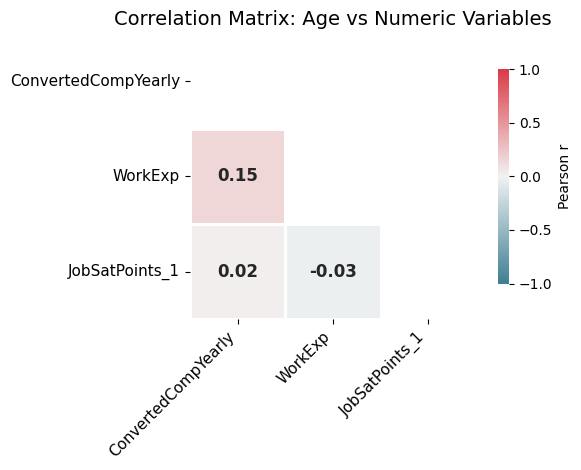

In [55]:
## Write your code here

df_corr = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()
corr_matrix = df_corr[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
print(corr_matrix)

cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Visualize the Correlation Matrix
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    vmin=-1, vmax=1,
    center=0,
    annot=True,
    fmt='.2f',
    annot_kws={"size":12, "weight":"bold"},
    linewidths=0.8,
    linecolor='white',
    cbar_kws={"shrink":0.75, "label":"Pearson r"},
    square=True
)

plt.title('Correlation Matrix: Age vs Numeric Variables', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.savefig('corr_heatmap.png', dpi=200, bbox_inches='tight')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


Samples: 23435
Samples with WorkExp: 16144
Samples with JobSatPoints_1: 16120
Work Experience (years) - Pearson: 0.154, Spearman: 0.482


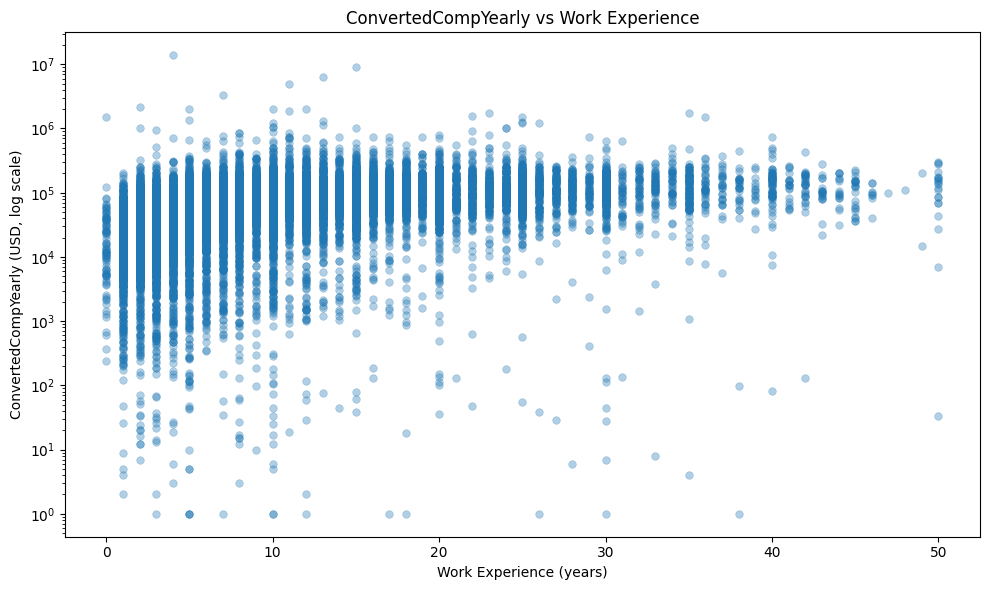

Job Satisfaction Points (JobSatPoints_1) - Pearson: 0.020, Spearman: 0.035


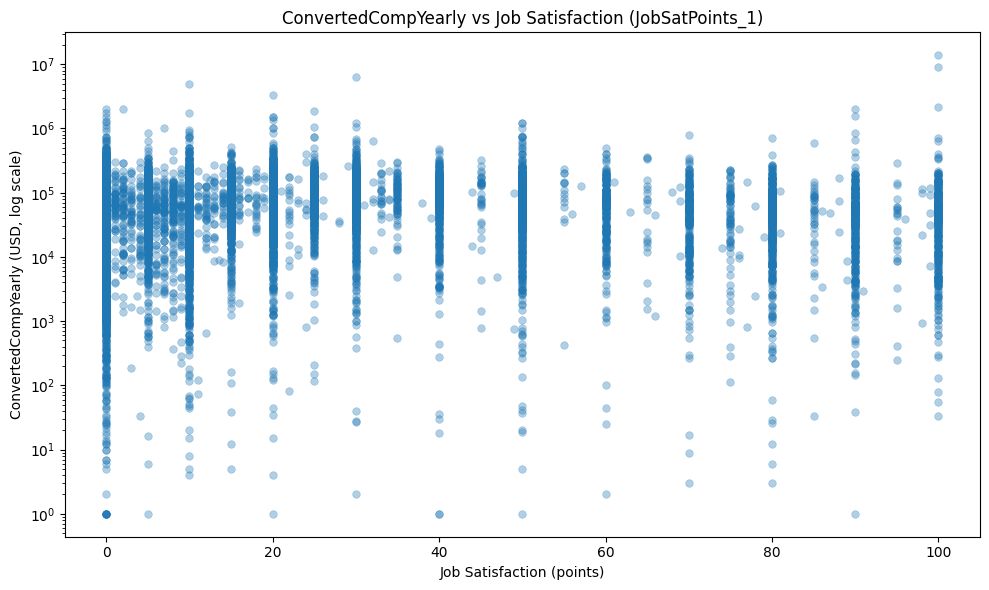

In [57]:
## Write your code here

# select relevant columns
comp = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].copy()

# drop rows missing salary
comp = comp.dropna(subset=['ConvertedCompYearly'])

# convert salary to numeric
comp['ConvertedCompYearly'] = pd.to_numeric(comp['ConvertedCompYearly'], errors='coerce')
comp = comp.dropna(subset=['ConvertedCompYearly'])

# helper to extract a numeric years value from WorkExp (robust to strings like "5-10 years" or "3 years")
def parse_years(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float)):
        return float(x)
    s = str(x)
    # try direct numeric
    m = re.search(r'(\d+(\.\d+)?)', s)
    if not m:
        return np.nan
    nums = re.findall(r'(\d+(\.\d+)?)', s)
    nums = [float(n[0]) for n in nums]
    if len(nums) == 1:
        return nums[0]
    # if a range like "5-10" take the mean
    return float(np.mean(nums))

comp['WorkExpNum'] = comp['WorkExp'].apply(parse_years)

# convert JobSatPoints_1 to numeric if possible
comp['JobSatNum'] = pd.to_numeric(comp['JobSatPoints_1'], errors='coerce')

# Quick summary of available samples
print("Samples:", len(comp))
print("Samples with WorkExp:", comp['WorkExpNum'].notna().sum())
print("Samples with JobSatPoints_1:", comp['JobSatNum'].notna().sum())

# Function to compute and print correlations for a given x-col
def show_corrs(xcol, label):
    df2 = comp[[xcol, 'ConvertedCompYearly']].dropna()
    if df2.empty:
        print(f"No data for {label}")
        return
    pearson = df2.corr(method='pearson').iloc[0,1]
    spearman = df2.corr(method='spearman').iloc[0,1]
    print(f"{label} - Pearson: {pearson:.3f}, Spearman: {spearman:.3f}")
    return df2

# Plot: ConvertedCompYearly vs WorkExpNum
df_work = show_corrs('WorkExpNum', 'Work Experience (years)')
if df_work is not None and not df_work.empty:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='WorkExpNum', y='ConvertedCompYearly', data=df_work, alpha=0.35, s=30, edgecolor=None)
    plt.yscale('log')
    plt.xlabel('Work Experience (years)')
    plt.ylabel('ConvertedCompYearly (USD, log scale)')
    plt.title('ConvertedCompYearly vs Work Experience')
    plt.tight_layout()
    plt.show()

# Plot: ConvertedCompYearly vs JobSatNum
df_sat = show_corrs('JobSatNum', 'Job Satisfaction Points (JobSatPoints_1)')
if df_sat is not None and not df_sat.empty:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='JobSatNum', y='ConvertedCompYearly', data=df_sat, alpha=0.35, s=30, edgecolor=None)
    plt.yscale('log')
    plt.xlabel('Job Satisfaction (points)')
    plt.ylabel('ConvertedCompYearly (USD, log scale)')
    plt.title('ConvertedCompYearly vs Job Satisfaction (JobSatPoints_1)')
    plt.tight_layout()
    plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
